# Jiaxu He
# ANLY-590
# Assignment 1


## 1 Feedforward: Building a ReLu 2 Layer neural network

### 1.1 

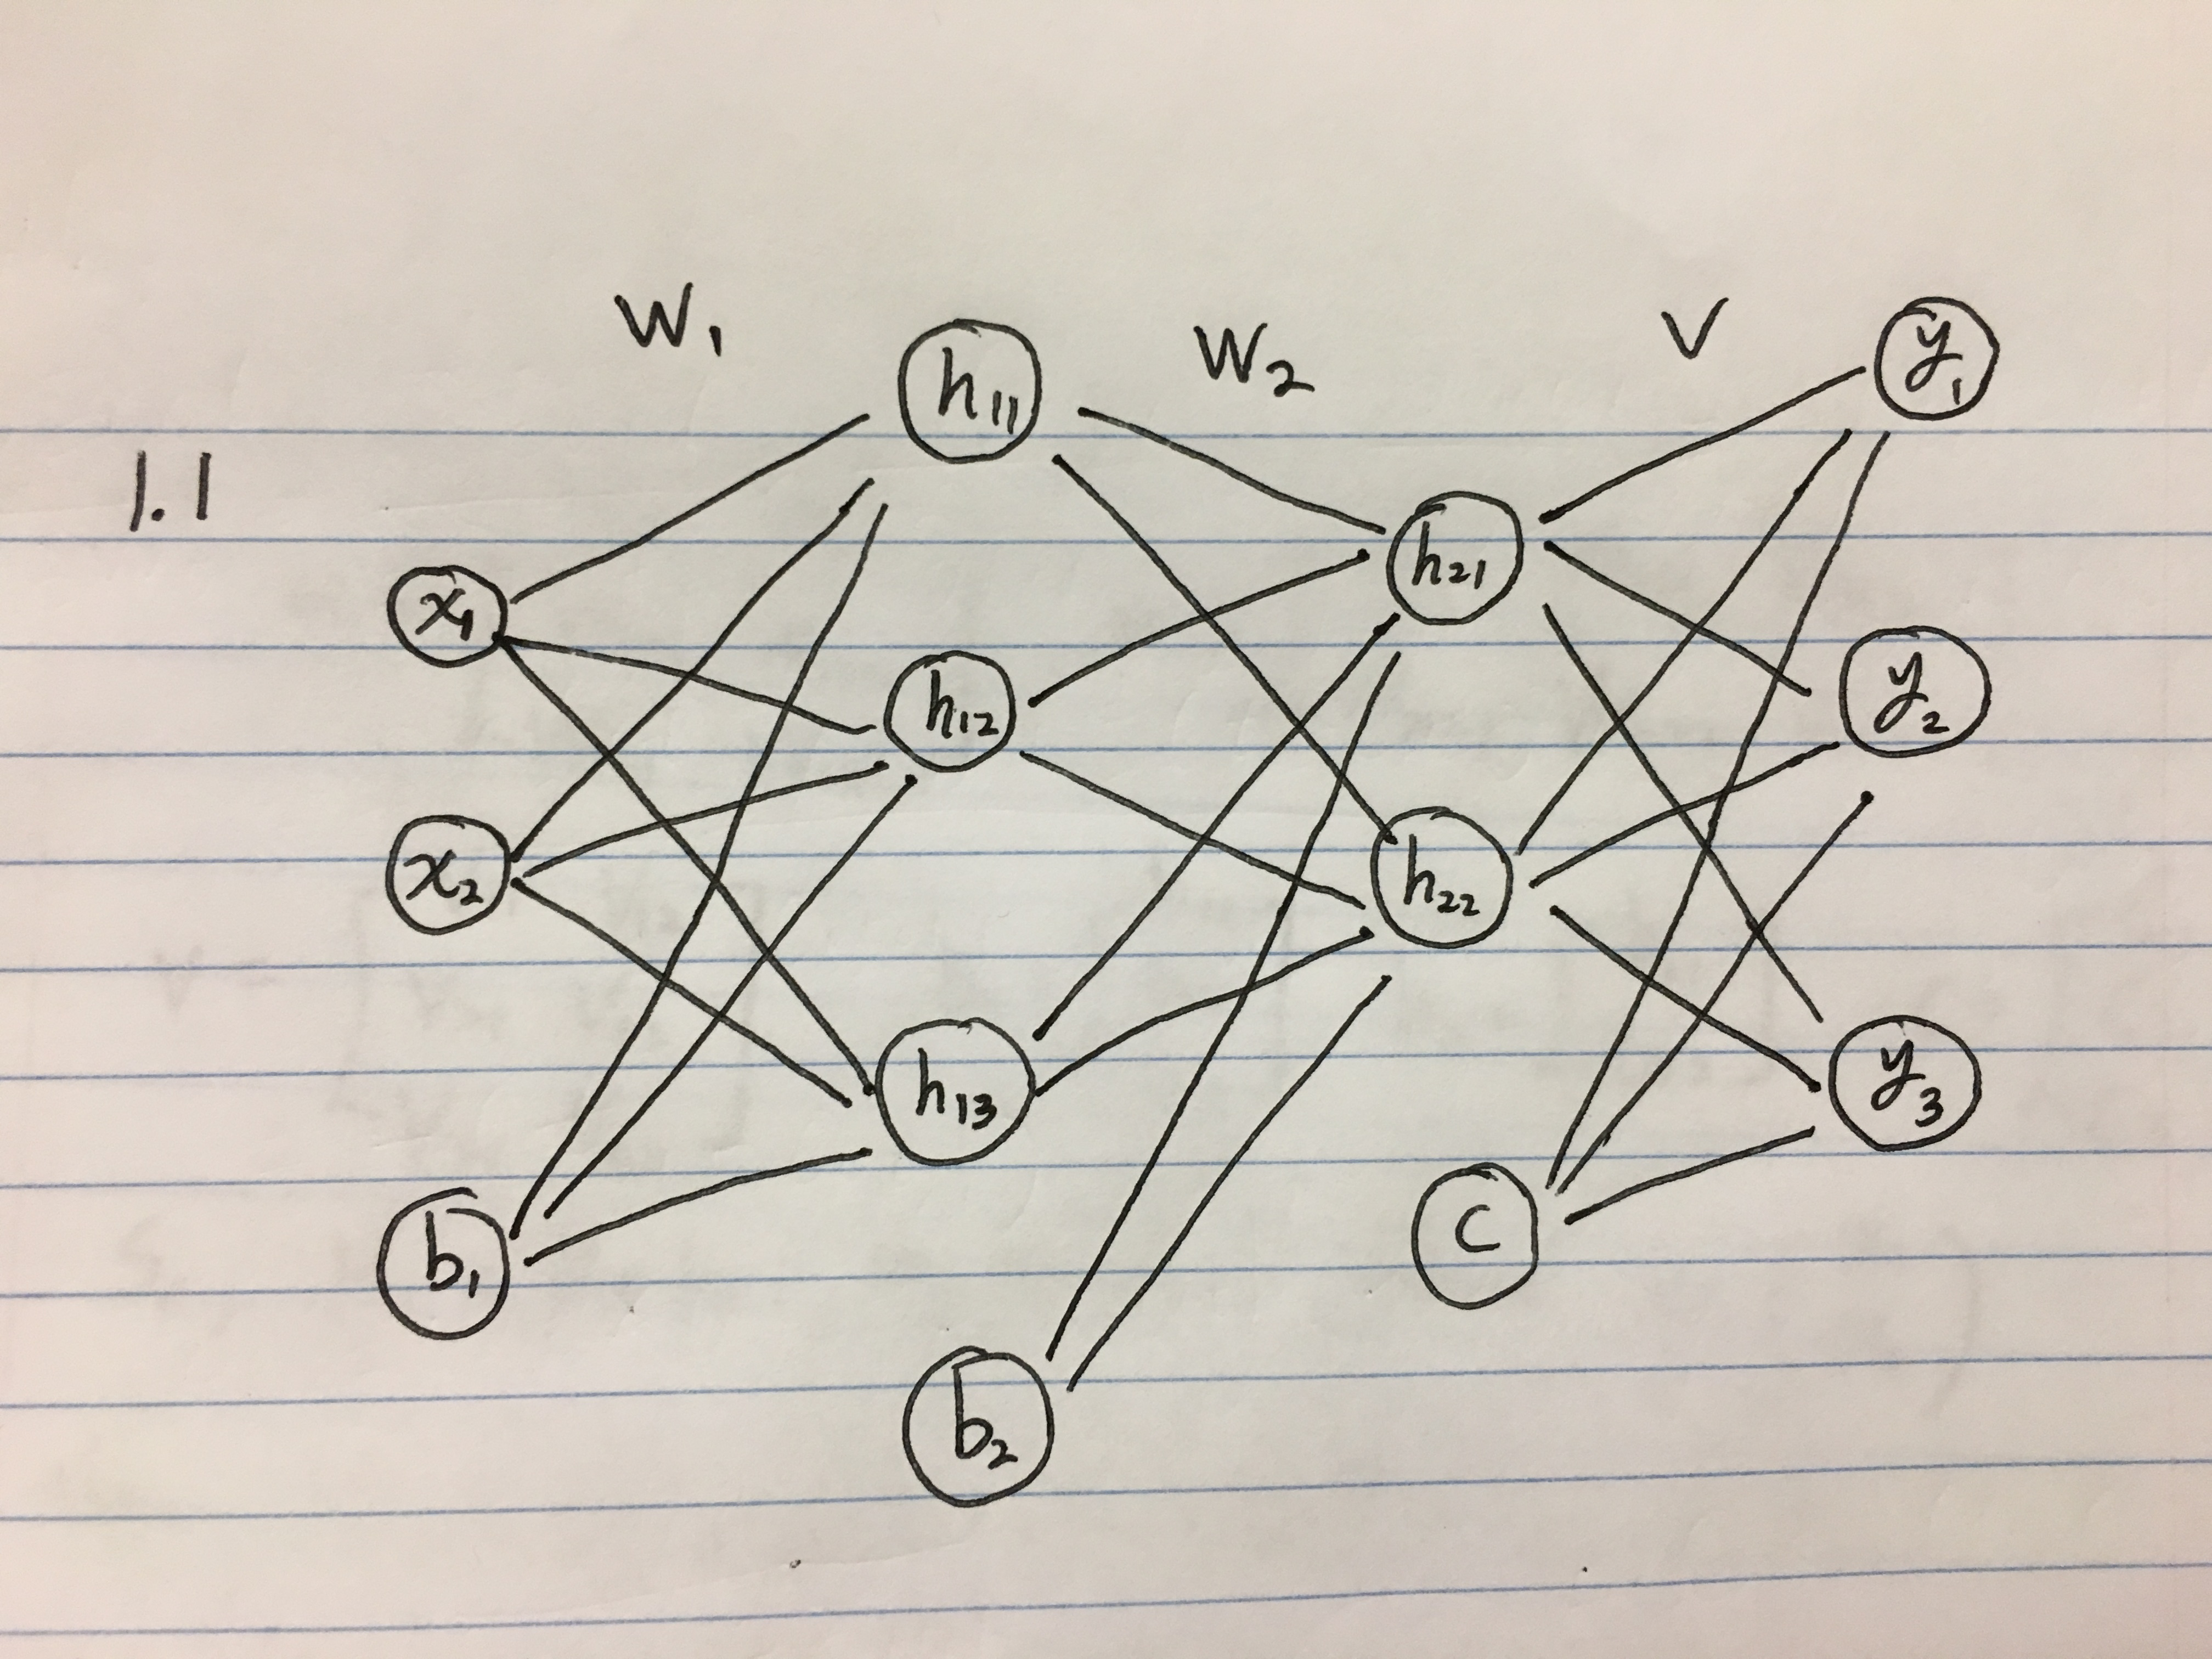

In [95]:
from IPython.display import Image
Image(filename = "a1_p11.jpg")

### 1.2 Write out the mathematical equation for this network

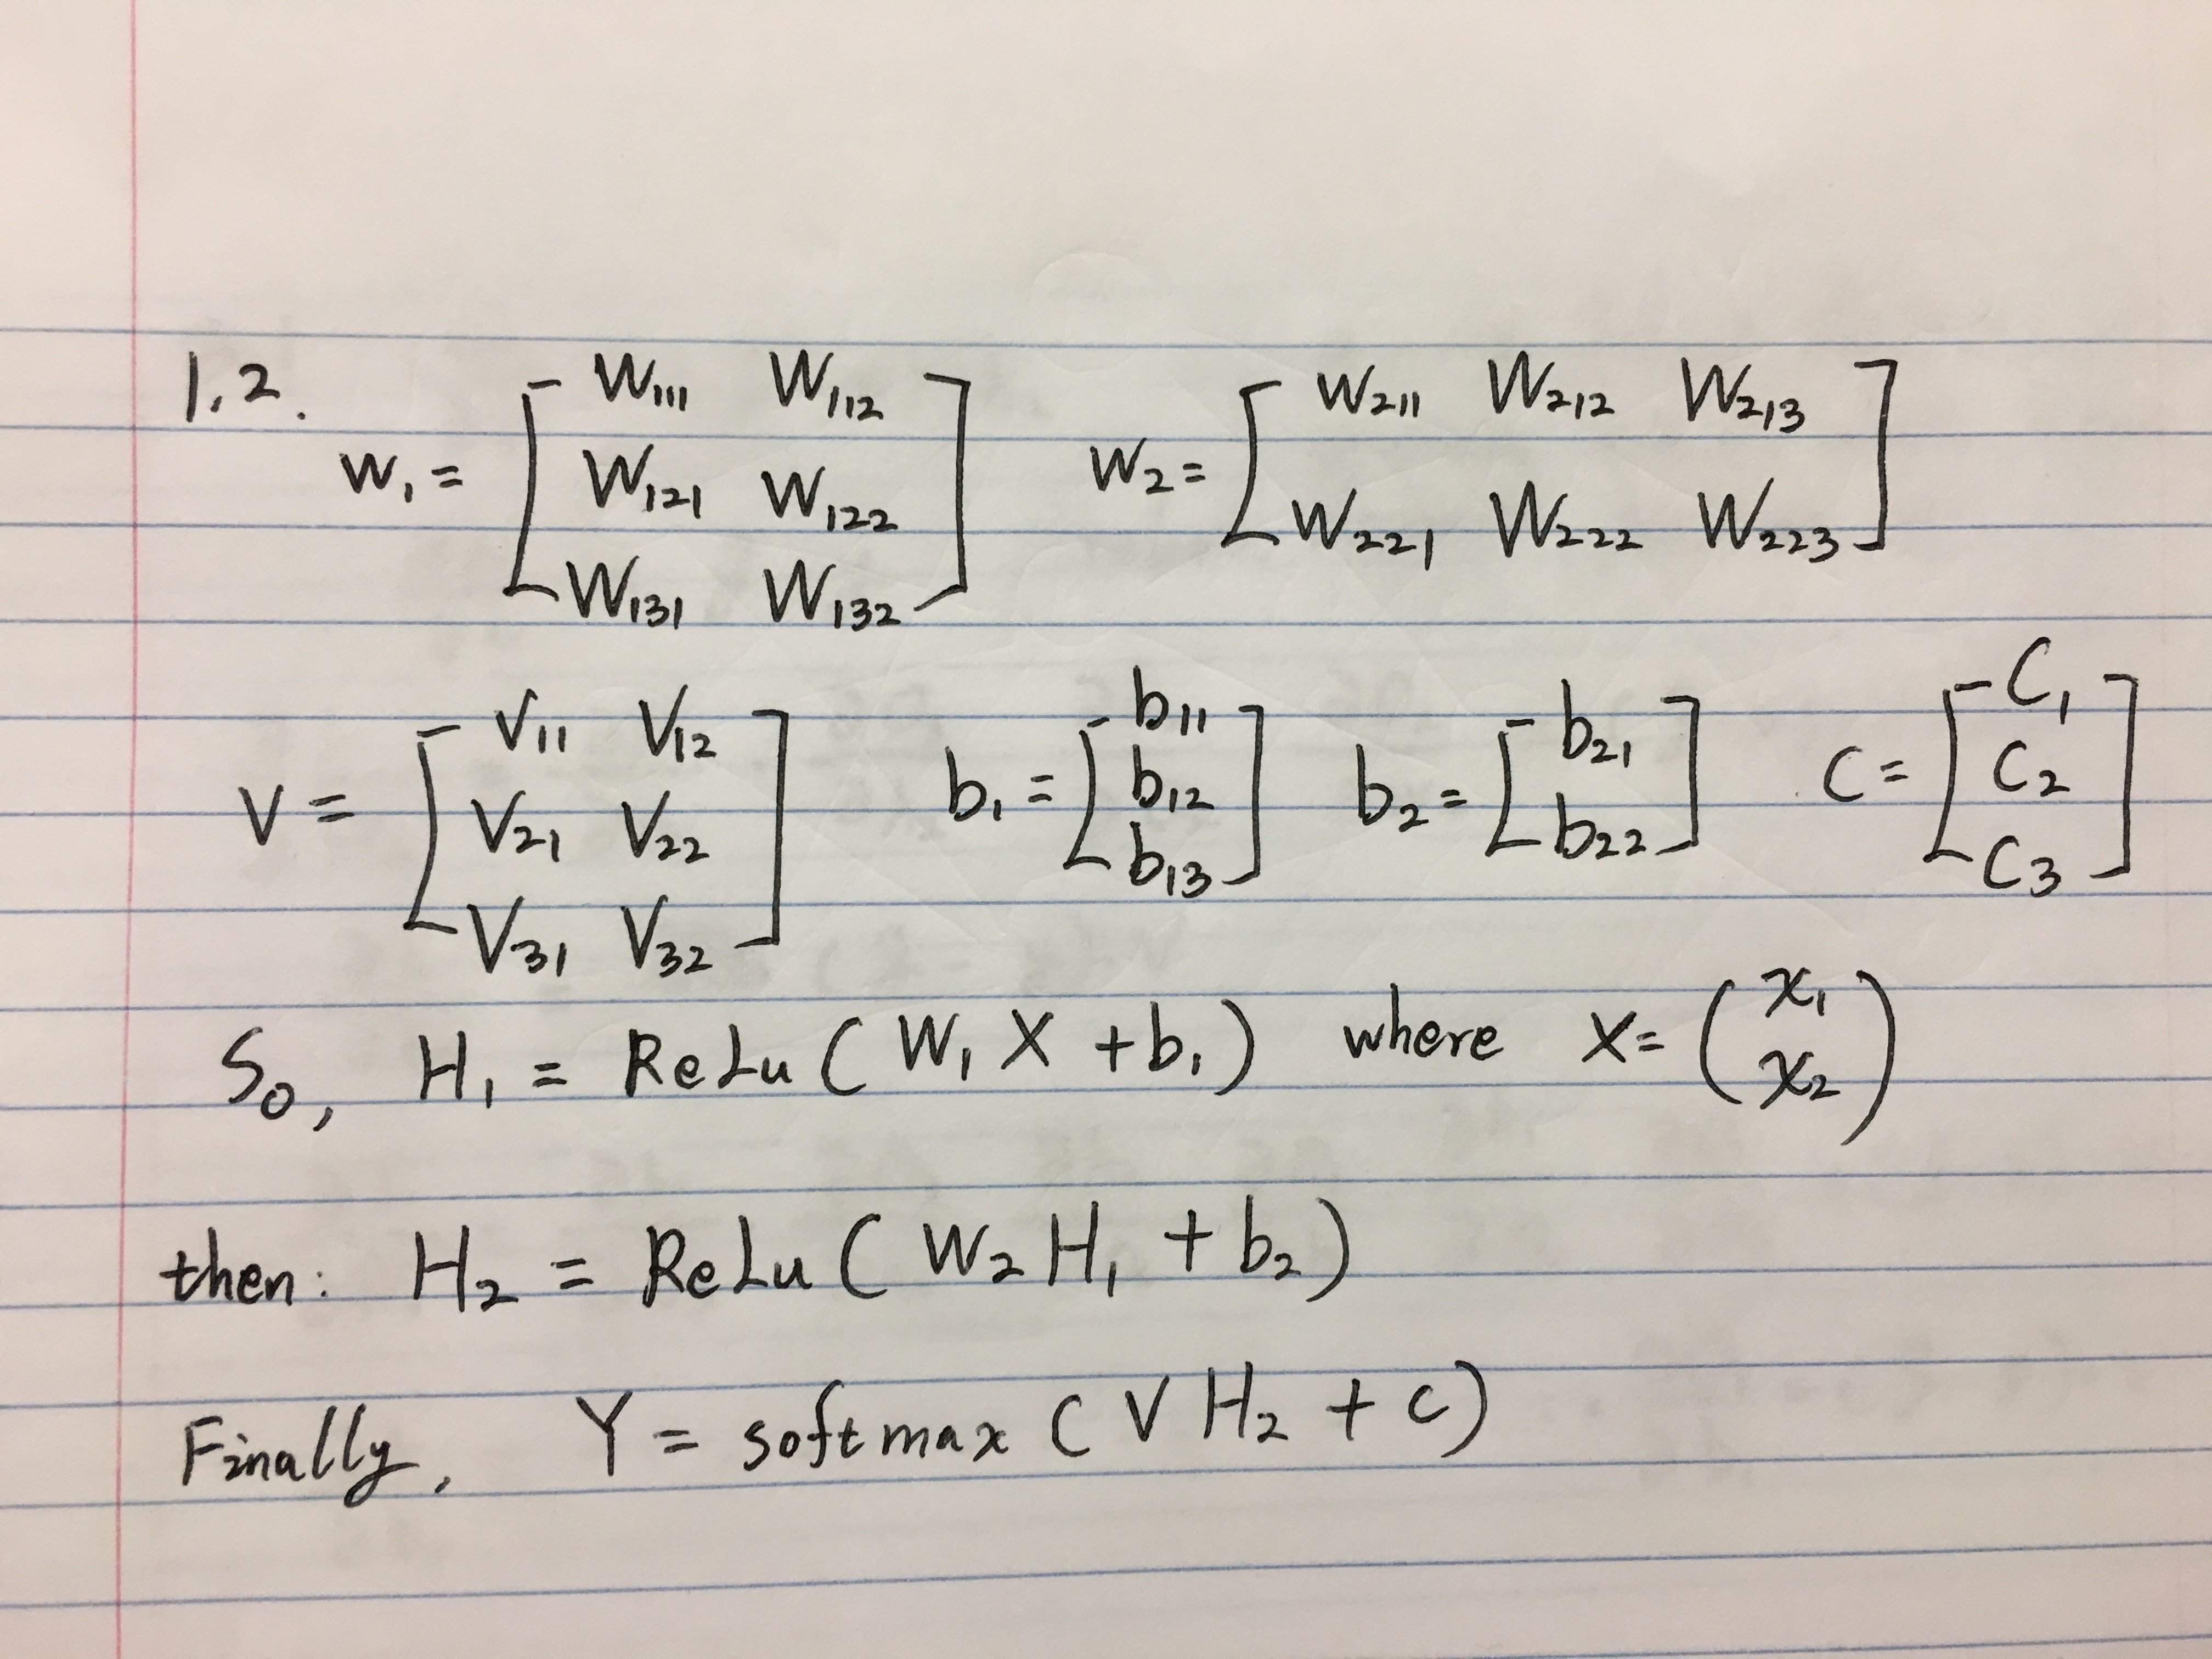

In [96]:
Image(filename = "a1_p12.jpg")

### 1.3 Write out the function in python, call it ff nn 2 ReLu(...)

In [5]:
import numpy as np
def ReLu(x):
    return np.maximum(0, x)


def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x), axis = 0))[np.newaxis,:]


def ff_nn_2_ReLu(x, w1, w2, v, b1, b2, c):
    z1 = np.dot(w1, x) + b1
    h1 = ReLu(z1)
    z2 = np.dot(w2, h1) + b2
    h2 = ReLu(z2)
    z3 = np.dot(v, h2) + c
    return softmax(z3)

### 1.4 

In [6]:
x = np.array([[1, 0, 0], [-1, -1, 1]])

w1 = np.array([[1, 0], [-1, 0], [0, 0.5]])

w2 = np.array([[1, 0, 0], [-1, -1, 0]])

v = np.array([[1, 1], [0, 0], [-1, -1]])

b1 = np.array([[0], [0], [1]])

b2 = np.array([[1], [-1]])

c = np.array([[1], [0], [0]])

ff_nn_2_ReLu(x, w1, w2, v, b1, b2, c)

array([[ 0.94649912,  0.84379473,  0.84379473],
       [ 0.04712342,  0.1141952 ,  0.1141952 ],
       [ 0.00637746,  0.04201007,  0.04201007]])

So, the class probabilities associated with the forward pass of first sample is:
[ 0.94649912,  0.84379473,  0.84379473]

the class probabilities associated with the forward pass of second sample is:
[ 0.04712342,  0.1141952 ,  0.1141952 ]

the class probabilities associated with the forward pass of third sample is:
[ 0.00637746,  0.04201007,  0.04201007]

## 2 Gradient Descent

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

### 2.1 What are the partial derivatives of f with respect to x and to y?

$$\frac{\partial f}{\partial x} = -2(1-x) - 400x(y-x^2) =  400x^3 + 2x - 400xy -2$$ 

$$\frac{\partial f}{\partial y} = 200(y-x^2) = -200x^2 + 200y$$

### 2.2 Create a visualization of the contours of the Rosenbrock function.

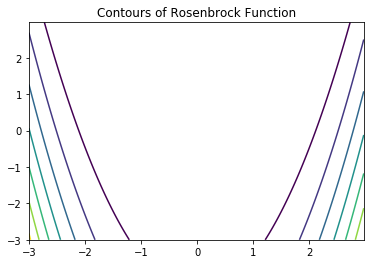

In [4]:
delta = 0.03
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
plt.title("Contours of Rosenbrock Function")
plt.show()

### 2.3 Write a Gradient Descent algorithm for finding the minimum of the function.  Visualize your results with a few different learning rates.

In [5]:
def grad_f(vector):
    x, y = vector
    dfdx = 400*(x**3) + 2*x - 400*x*y - 2
    dfdy = -200*(x**2) + 200*y    
    return np.array([dfdx, dfdy])


def grad_descent(starting_point = None, iterations = 10, learning_rate = 0.0002):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3, 3, size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

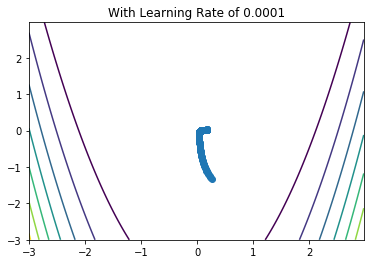

In [8]:
np.random.seed(100)
traj = grad_descent(iterations = 1000, learning_rate = 0.0001)

plt.contour(X, Y, Z)
plt.title("With Learning Rate of 0.0001")
x= traj[:,0]
y= traj[:,1]
plt.plot(x, y, '-o')
plt.show()

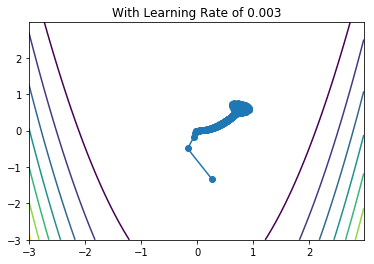

In [14]:
np.random.seed(100)
traj = grad_descent(iterations = 10000, learning_rate = 0.003)

plt.contour(X, Y, Z)
plt.title("With Learning Rate of 0.003")
x= traj[:,0]
y= traj[:,1]
plt.plot(x, y, '-o')
plt.show()

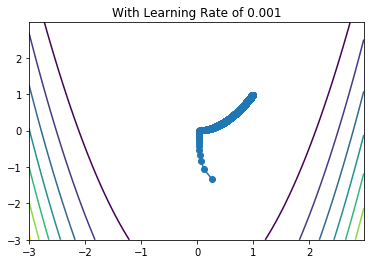

In [16]:
np.random.seed(100)
traj = grad_descent(iterations = 10000, learning_rate = 0.001)

plt.contour(X, Y, Z)
plt.title("With Learning Rate of 0.001")
x= traj[:,0]
y= traj[:,1]
plt.plot(x, y, '-o')
plt.show()

#### It is easy to find out that the optimal point is (1, 1), as the learning rate is 0.0001, it does not point to (1, 1). So, increased both iterations and learning rate. However, when learning rate is 0.003, it seems learned too fast, which caused bunch of dots around (1, 1). Finally, chose the learning rate of 0.01, and it looks much better!



### 2.4 Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [17]:
def grad_descent_with_momentum(starting_point = None, iterations = 10, alpha = 0.9, epsilon = 10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3, 3, size = 2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

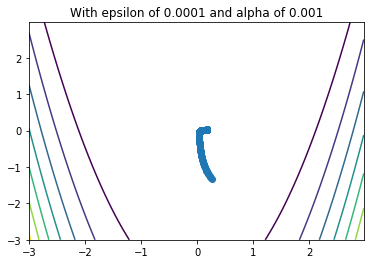

In [18]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations = 1000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title("With epsilon of 0.0001 and alpha of 0.001")
plt.plot(x, y, '-o')
plt.show()

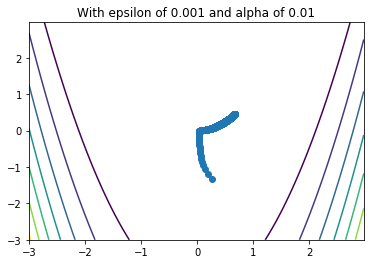

In [20]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations = 2000, epsilon=0.0005, alpha=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title("With epsilon of 0.0005 and alpha of 0.005")
plt.plot(x, y, '-o')
plt.show()

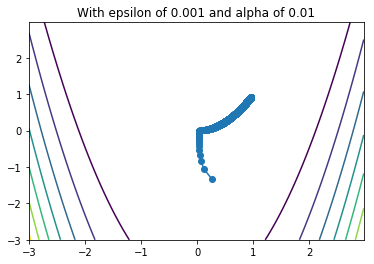

In [21]:
np.random.seed(100)
traj = grad_descent_with_momentum(iterations = 5000, epsilon=0.001, alpha=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.title("With epsilon of 0.001 and alpha of 0.01")
plt.plot(x, y, '-o')
plt.show()

#### Similar results happened here, as iterations, epsilon, alpha are really low, the result did not point to the optimal point (1, 1), then we slightly increase iterations, epsilon and alpha, the results got better and better.


## 3. Backprop

### 3.1 For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

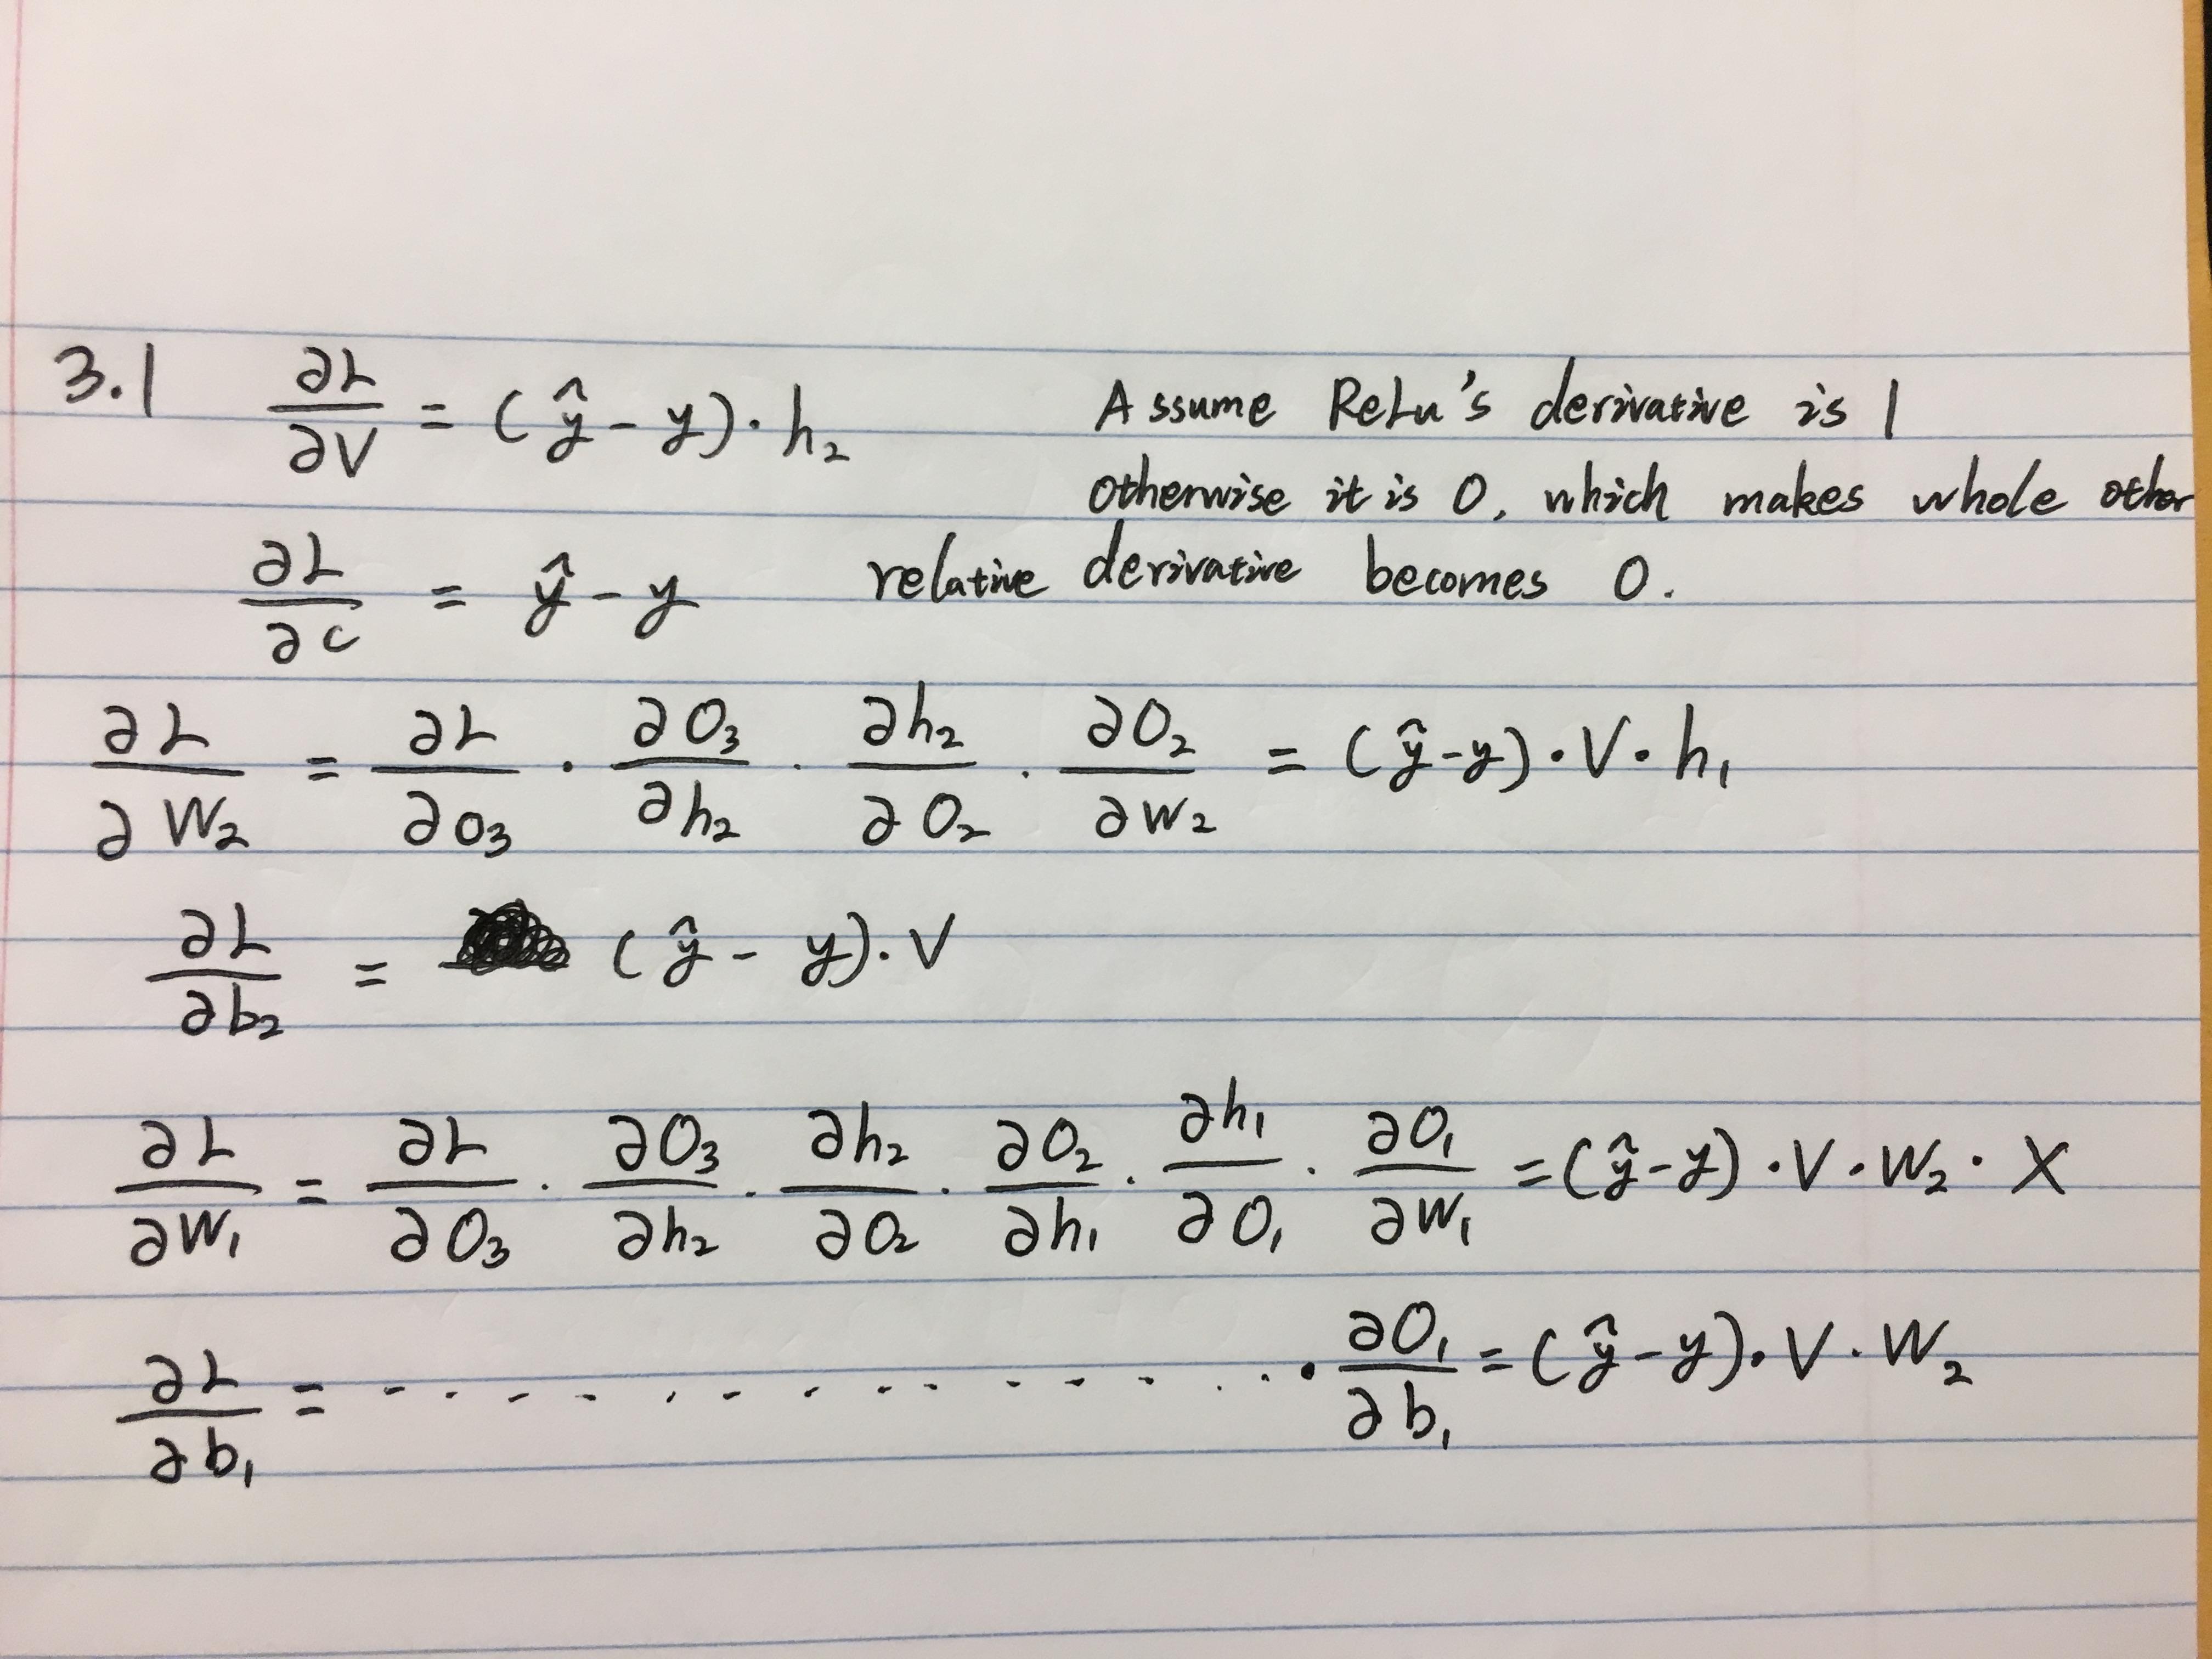

In [97]:
Image(filename = "a1_p31.jpg")

### 3.2 Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [76]:
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()

def grad_f(param, x, y):
    x = x.T
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3 = param
    
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    b_2 = np.array([[b2_1], [b2_2]])
    c = np.array([[c_1], [c_2], [c_3]])
    
    z_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(z_1)
    z_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(z_2)
    z_3 = np.dot(v, h_2) + c
    y_hat = softmax(z_3).T
    
    bw1 = ((w_2.T.dot(  (((y_hat - y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).dot(x.T)
    bw2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).dot(h_1.T)
    bv = h_2.dot((y_hat - y)).T
    bb1 = ((w_2.T.dot(  (((y_hat - y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).sum(axis = 1).reshape(3, 1)
    bb2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).sum(axis = 1).reshape(2, 1)
    bc = (y_hat - y).sum(axis = 0).reshape(3, 1)
    
    w1_11 = bw1[0,0]
    w1_12 = bw1[0,1]
    w1_21 = bw1[1,0]
    w1_22 = bw1[1,1]
    w1_31 = bw1[2,0]
    w1_32 = bw1[2,1]

    w2_11 = bw2[0,0]
    w2_12 = bw2[0,1]
    w2_21 = bw2[0,1]
    w2_22 = bw2[1,0]
    w2_31 = bw2[1,1]
    w2_32 = bw2[1,2]
    
    v_11 = bv[0,0]
    v_12 = bv[0,1]
    v_21 = bv[1,0]
    v_22 = bv[1,1]
    v_31 = bv[2,0]
    v_32 = bv[2,1]
    
    b1_1 = np.squeeze(bb1[0]) 
    b1_2 = np.squeeze(bb1[1])
    b1_3 = np.squeeze(bb1[2])
    
    b2_1 = np.squeeze(bb2[0])
    b2_2 = np.squeeze(bb2[1])
    
    c_1 = np.squeeze(bc[0])
    c_2 = np.squeeze(bc[1])
    c_3 = np.squeeze(bc[2])    
    
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3])



### 3.3

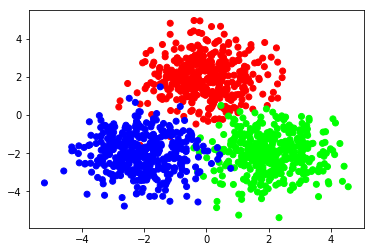

In [77]:
x1 = np.random.multivariate_normal(mean = [0, 2], cov = [[1, 0], [0, 1]], size = 400)
x2 = np.random.multivariate_normal(mean = [2, -2], cov = [[1, 0], [0, 1]], size = 400)
x3 = np.random.multivariate_normal(mean = [-2, -2], cov = [[1, 0], [0, 1]], size = 400)
X = np.concatenate([x1, x2, x3])
y1 = np.array([[1,0,0] for i in range(400)])
y2 = np.array([[0,1,0] for i in range(400)])
y3 = np.array([[0,0,1] for i in range(400)])
Y = np.concatenate([y1, y2, y3])
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

### 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [78]:
def grad_descent(x, y, iterations=10, learning_rate = 0.001):
    point = np.random.uniform(-0.1, 0.1, size = 26)
    trajectory = [point]
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3 = point
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    b_2 = np.array([[b2_1], [b2_2]])
    c = np.array([[c_1], [c_2], [c_3]])
    losses = [loss(y, ff_nn_2_ReLu(x.T, *(w_1, w_2, v, b_1, b_2, c)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3 = point
        w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
        w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
        v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
        b_1 = np.array([[b1_1],[b1_2],[b1_3]])
        b_2 = np.array([[b2_1], [b2_2]])
        c = np.array([[c_1], [c_2], [c_3]])
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *(w_1, w_2, v, b_1, b_2, c)).T))
    return (np.array(trajectory), losses)

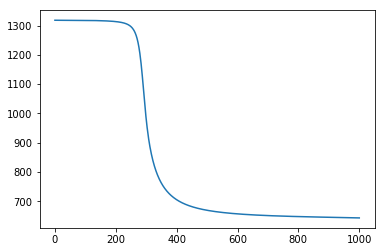

In [79]:
traj, losses = grad_descent(X, Y, iterations=1000, learning_rate=0.0001)
plt.plot(losses)
plt.show()

#### The plot above showed the track of the total Loss at each iteration.


### 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more eﬃciently.

In [91]:
def grad_descent_with_momentum(x, y, iterations = 1000, epsilon = 0.001, alpha = 0.01):
    point = np.random.uniform(-0.1, 0.1, size = 26)
    trajectory = [point]
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3 = point
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    b_2 = np.array([[b2_1], [b2_2]])
    c = np.array([[c_1], [c_2], [c_3]])
    losses = [loss(y, ff_nn_2_ReLu(x.T, *(w_1, w_2, v, b_1, b_2, c)).T)]
    vv = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        vv = alpha*vv + epsilon*grad
        point = point - vv
        trajectory.append(point)
        w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, v_11, v_12, v_21, v_22, v_31, v_32, b1_1, b1_2, b1_3, b2_1, b2_2, c_1, c_2, c_3 = point
        w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
        w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
        v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
        b_1 = np.array([[b1_1],[b1_2],[b1_3]])
        b_2 = np.array([[b2_1], [b2_2]])
        c = np.array([[c_1], [c_2], [c_3]])
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *(w_1, w_2, v, b_1, b_2, c)).T))
    return (np.array(trajectory), losses)

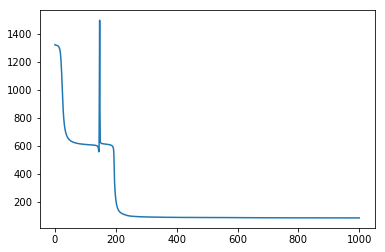

In [92]:
traj, losses = grad_descent_with_momentum(X, Y, iterations = 1000, epsilon = 0.001, alpha = 0.01)
plt.plot(losses)
plt.show()

#### The plot above showed the track of the total Loss at each iteration.
#### And compare two methods and two graphs, it likely to find out that gradient descent with momentum algorithm converges more eﬃciently. From the graph , it almost twice efficient as the gradient descent.